In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from uncertainties import ufloat
from uncertainties.umath import *

In [21]:
### Converting scin bw to scattering ###
def f_to_sc(fsci): ###bandwidth in MHz
    sc = 1/(2*np.pi*fsci)

def scale_sc(sc, obs_freq, ref_f=1000, p=-4):
    sc_1g = sc*((ref_f/obs_freq)**p)
    return sc_1g
    

In [7]:
###### Getting scattering for effelesberg bursts ######
sc_bw = [1.07,1.01,3.4] ##MHz
sc_bw_err = [0.46,0.71,0.24]

sc_bw=np.array(sc_bw)
sc_bw_err = np.array(sc_bw_err)

sc_eff, sc_err_eff = f_to_sc(sc_bw,sc_bw_err) ### in microseconds

print(sc_eff,sc_err_eff)

[0.14874294 0.15757915 0.04681028] [0.01017725 0.01763014 0.00052589]


In [8]:
#### MJD for R3 detections by other telescopes ####
MJD_others = [58931.4200371, 58931.4523516, 58932.3291835, 58802.25840267, 58836.16929624, 58836.16929695,
              58836.17591822, 58868.08221442, 58868.08461892, 58868.08679636, 58653.2785078914, 58708.14344,
              58722.20383, 58723.21829, 59353.830062663, 59435.751975537, 59484.464427655]
MJD_others = np.array(MJD_others)


In [9]:
#### Reading Scattering data ####

data_sc = pd.read_csv('/Users/ketansand/Downloads/Codes/CSV/Scattering.csv')
freq = data_sc["Freq"].to_numpy()
sc = data_sc["Scattering"].to_numpy()
sc_errs = data_sc["Sc_Err"].to_numpy()

data_BB = pd.read_csv('BB_data_R3.csv')
sc_BB = data_BB['Scattering(s)'].to_numpy()
sc_err_BB = data_BB['Sc_err(s)'].to_numpy()
MJD_BB = data_BB['MJD'].to_numpy()
freq_BB = np.full(len(sc_BB),600)

In [12]:
print(np.mean(sc_BB), np.median(sc_BB), np.max(sc_BB), np.min(sc_BB))

0.000510144888315302 0.0003598110823086 0.0022331977864801 8.772376470278798e-05


In [13]:
sc_others = []
sc_err_others = []
freq_others = []
for i in range(len(sc)):
    if (freq[i]!=328) and (sc_errs[i]<10):
        sc_others.append(sc[i])
        sc_err_others.append(sc_errs[i])
        freq_others.append(freq[i])
        
for j in range(len(sc_eff)):
    sc_others.append(sc_eff[j]/1e3)
    sc_err_others.append(sc_err_eff[j]/1e3)
    freq_others.append(5000)

sc_others = np.array(sc_others)
sc_err_others = np.array(sc_err_others)
freq_others = np.array(freq_others)

print(sc_others)
print(sc_err_others)
print(freq_others)

[2.51000000e+00 1.65000000e+00 1.16000000e+00 2.90000000e+00
 5.90000000e+00 5.90000000e+00 1.70000000e+00 4.10000000e+00
 3.10000000e+00 1.80000000e+00 3.00000000e-03 5.41420000e+01
 9.45500000e+01 4.66900000e+01 1.48742937e-04 1.57579152e-04
 4.68102774e-05]
[4.00000000e-01 5.00000000e-01 3.00000000e-01 1.00000000e-04
 3.00000000e-01 3.00000000e-01 1.00000000e-04 3.00000000e-01
 5.00000000e-01 9.00000000e-01 1.00000000e-04 4.00000000e-03
 2.00000000e-02 3.00000000e-02 1.01772523e-05 1.76301442e-05
 5.25888496e-07]
[ 400  400  800  350  350  350  350  350  350  350 1700  150  150  150
 5000 5000 5000]


In [14]:
sc_err_BB = sc_err_BB*1e3 ## Converting to milliseconds
sc_BB = sc_BB*1e3
sc_all = np.concatenate((sc_others,sc_BB)) ### Combining data
sc_err_all = np.concatenate((sc_err_others,sc_err_BB))
freq_all = np.concatenate((freq_others,freq_BB))
Mjd_all = np.concatenate((MJD_others,MJD_BB))

[0.49580247 0.32592593 3.66617284 0.335788   0.6831549  0.6831549
 0.19684124 0.47473476 0.35894579 0.20842014 0.19333565 0.21149219
 0.36933594 0.18238281 0.71731741 0.75993032 0.22574401 0.80186315
 0.56449695 0.25310975 0.28958772 1.54579716 0.2702961  0.71212348
 0.13658506 2.23319779 0.57490646 2.20939471 0.35981108 0.35757661
 0.59587738 0.56958596 0.4477475  0.13512326 0.45124572 0.15793692
 0.49863251 0.19119343 0.33294788 1.0114809  0.87564708 0.19000777
 0.64886114 0.16012003 0.2541209  0.2013459  0.49531791 0.24648686
 0.46075733 0.08772376 0.88414172 0.18030317 0.32425621 0.35633803
 0.4432835  0.15657131 0.66020971 0.41539796 0.40344524 0.25599499
 0.21976821 0.33590375]


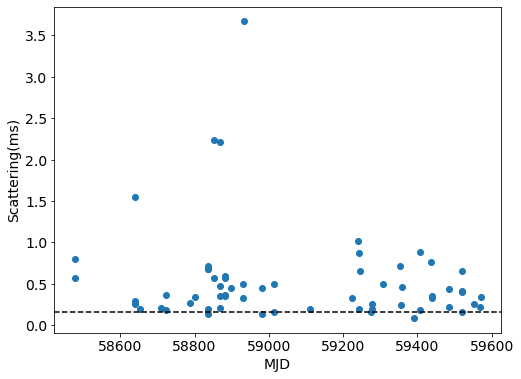

In [15]:
sc_ref = scale_sc(sc_all,freq_all,600)
print(sc_ref)
ne2001 = scale_sc(0.021,1000,600)
plt.figure(figsize=(8,6))
plt.plot(Mjd_all, sc_ref, linestyle='', marker='o')
plt.xlabel("MJD", fontsize=14)
plt.ylabel("Scattering(ms)", fontsize=14)
plt.axhline(ne2001, linestyle='--', c='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [28]:
s = scale_sc(1.7e-3,350,600)
print(s)

0.00019684124228395064


In [32]:
sc,err = f_to_sc(0.059,0.013)
print(sc+err)

2.7921388937832297


In [25]:
for i in range(len(sc_bw)):
    f = ufloat(sc_bw[i],sc_bw_err[i])
    x = 1/(2*np.pi*f)
    y = scale_sc(x,6000,600)
    print(y*)

(1.5+/-0.6)e+03
(1.6+/-1.1)e+03
468+/-33
